In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry import analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import DataAnalysis as aj

key = 'PGaO0oi7Tz4vaTq8px'

mpr = MPRester(key)

test_struc = mpr.get_structure_by_material_id('mp-600089')

In [2]:
test_struc

Structure Summary
Lattice
    abc : 6.017340300004827 6.017325890006377 6.017335960001867
 angles : 89.9999148751522 90.0000277084383 90.00014320772522
 volume : 217.8774910547569
      A : 6.0173403 -7.5e-06 -1.36e-06
      B : -7.54e-06 6.01732589 4.46e-06
      C : -1.55e-06 4.48e-06 6.01733596
PeriodicSite: Cs (6.0173, 6.0173, 6.0173) [1.0000, 1.0000, 1.0000]
PeriodicSite: Pb (3.0087, 3.0087, 3.0087) [0.5000, 0.5000, 0.5000]
PeriodicSite: Br (3.0087, 3.0087, 6.0173) [0.5000, 0.5000, 1.0000]
PeriodicSite: Br (3.0087, 6.0173, 3.0087) [0.5000, 1.0000, 0.5000]
PeriodicSite: Br (-0.0000, 3.0087, 3.0087) [0.0000, 0.5000, 0.5000]

In [3]:
test_stru = mpr.query(criteria = {'material_id':{'$in':['mp-600089']}}, properties = ['material_id','xrd.Cu.pattern'])
np.array(test_stru[0]['xrd.Cu.pattern'])[:,2]

array([14.721535430779282, 20.8774808841723, 25.641818735391993,
       29.693325706184524, 33.294346595625896, 36.579203201385994,
       42.49142425835869, 45.20673848204764, 47.79980896260991,
       50.29050109820485, 52.69429011463628, 55.02353033538012,
       57.28829084875317, 61.656477336526265, 63.772963333592884,
       65.85159464756698, 67.89693586001208, 69.91303009753308,
       71.9034964285283, 73.87160724403314, 77.7524818131401,
       79.6705651146179, 81.57701053468072, 83.47410441073183,
       87.24892483531704, 89.13083678677674, 92.89387699987844,
       94.77907475523544, 96.66947505985982, 98.56720027490853,
       100.47444670621078, 102.39350907143358, 104.32680789126945,
       108.24661888398472, 110.23890997876063, 112.25709039668206,
       114.30480843458565, 116.38614305663215, 118.50570306863708,
       120.66875411221268, 125.15072259687992, 127.48523831645126,
       129.8951510020554, 132.39301816834913, 134.9945964889674,
       137.7201541451636

In [4]:
data = mpr.query(chunk_size = 50, criteria={'elements':{'$in': ['Na']}}, properties = ['material_id','formula','xrd.Cu.pattern','spacegroup'])

In [5]:
data[0]['spacegroup']['number']

194

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

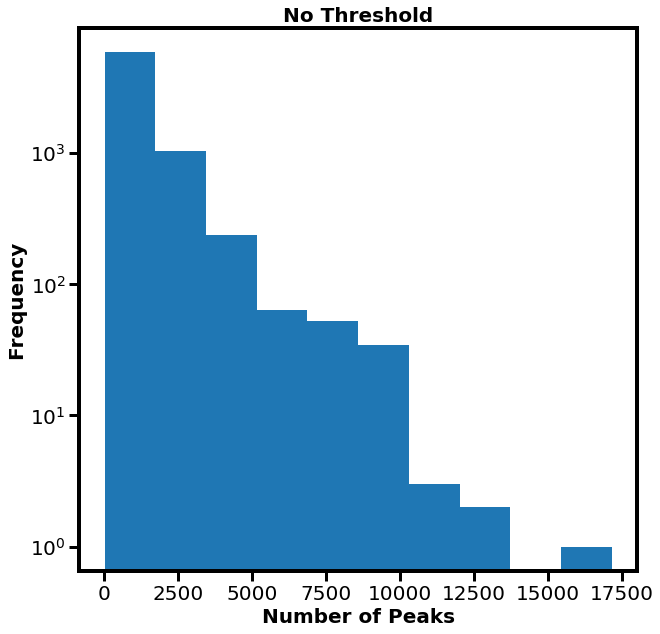

In [6]:
##using all peaks
peaks = [np.array(x['xrd.Cu.pattern'])[:,0] for i,x in enumerate(data) if x['xrd.Cu.pattern']]
index = [i for i,x in enumerate(data) if x['xrd.Cu.pattern']]
print(index)
number_peaks = [x.shape[0] for x in peaks]
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])

ax.hist([x.shape[0] for x in peaks])

aj.figure_quality_axes(ax,'Number of Peaks','Frequency','No Threshold',legend = False)
ax.set_yscale('log')

470
221
126
82
66


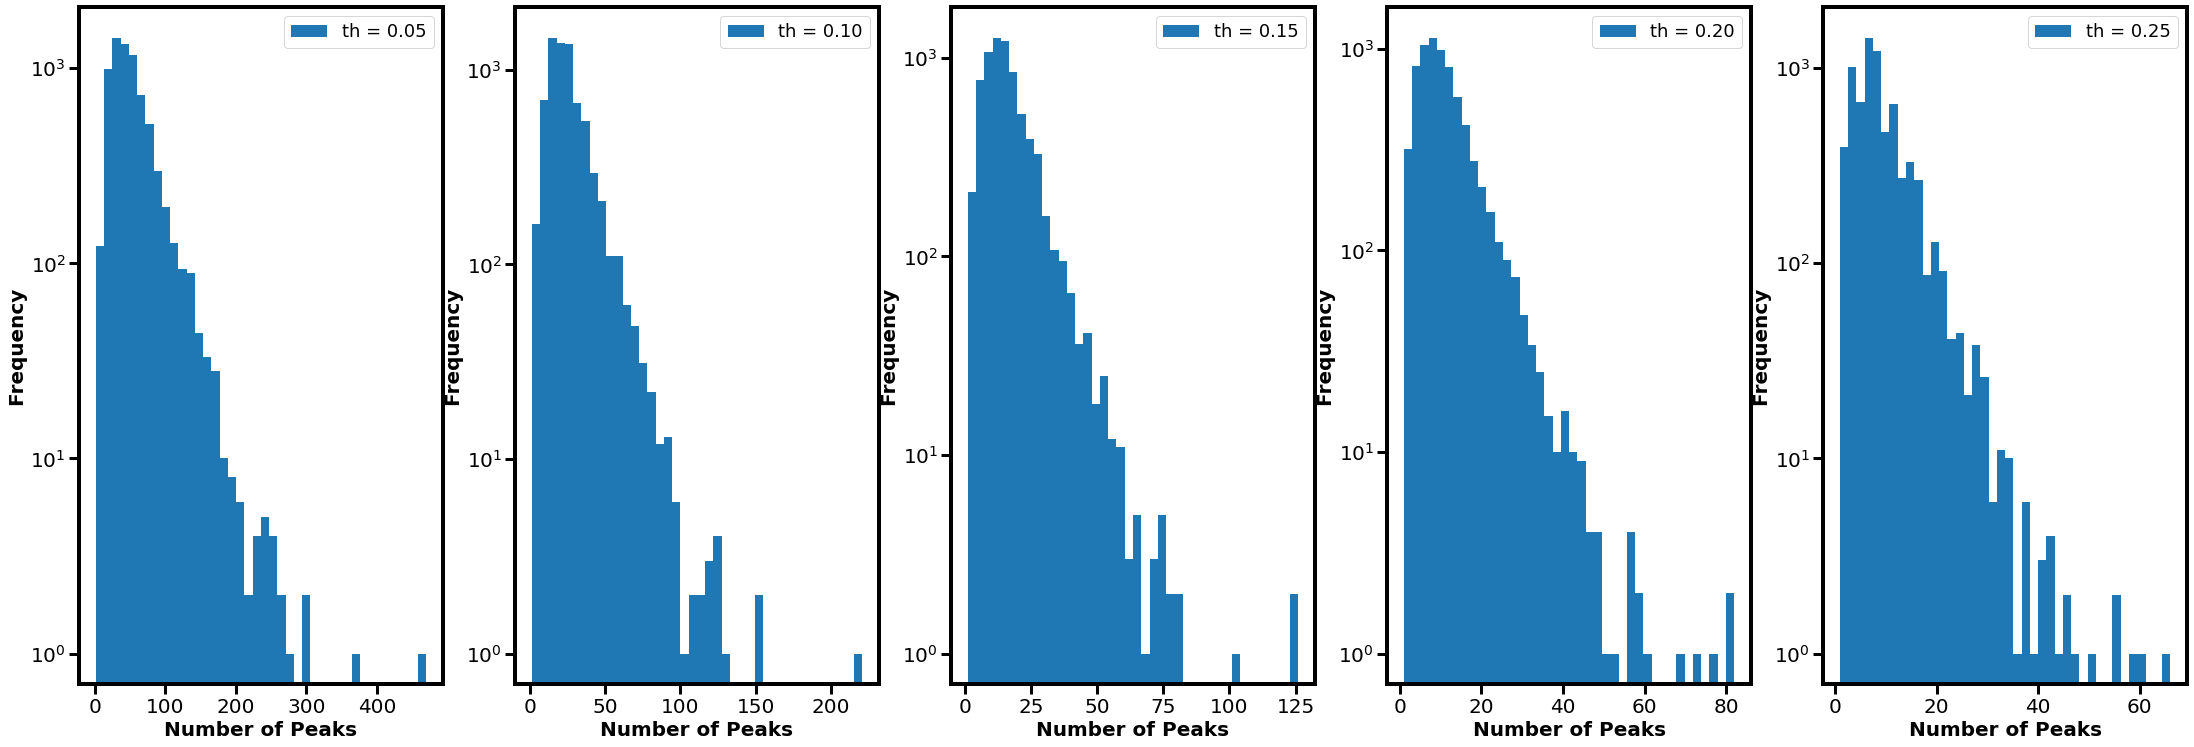

In [7]:
##normalizing and only taking peaks over a certain amount
thresholds_to_try = [0.05,0.1,0.15,0.2,0.25]

f2, ax2 = plt.subplots(ncols = len(thresholds_to_try), nrows = 1, figsize = [30, 10])
f2.tight_layout()
f2.subplots_adjust(wspace = 0.2)


for j, threshold in enumerate(thresholds_to_try):
    list_peaks = []
    list_thetas = []

    i=0
    for mat in data:
        if mat['xrd.Cu.pattern']:
            list_peaks.append(np.array(mat['xrd.Cu.pattern'])[:,0])
            list_thetas.append(np.array(mat['xrd.Cu.pattern'])[:,2])
            list_peaks[i] = list_peaks[i]/np.max(list_peaks[i])
            indices = np.where(list_peaks[i] > threshold)
            list_peaks[i] = list_peaks[i][indices]
            list_thetas[i] = list_thetas[i][indices]
            i+=1


    ax2[j].hist([x.shape[0] for x in list_peaks], bins = 40, label = 'th = {0:.2f}'.format(threshold))
    ax2[j].set_yscale('log')
    aj.figure_quality_axes(ax2[j], 'Number of Peaks','Frequency','',legend = True)

    print (np.max([x.shape[0] for x in list_peaks]))
    
    

In [8]:
print(len(index))
print (len(data))

7219
7296


In [9]:
##use threshold of 0.1
list_peaks = []
list_thetas = []
list_formulas = []
list_ids = []
list_spacegroups = []

th = 0.1
i=0
for mat in data:
    if mat['xrd.Cu.pattern']:
        list_peaks.append(np.array(mat['xrd.Cu.pattern'])[:,0])
        list_thetas.append(np.array(mat['xrd.Cu.pattern'])[:,2])
        list_formulas.append(mat['formula'])
        list_ids.append(mat['material_id'])
        list_spacegroups.append(mat['spacegroup']['number'])
        list_peaks[i] = list_peaks[i]/np.max(list_peaks[i])
        indices = np.where(list_peaks[i] > th)
        list_peaks[i] = list_peaks[i][indices]
        list_thetas[i] = list_thetas[i][indices]
        i+=1

        

In [10]:
##generate data for 2D NN
max_entries = np.max([len(x) for x in list_peaks])
max_entries_ind = np.argmax([len(x) for x in list_peaks])

feature_data = np.zeros((max_entries, max_entries, len(list_peaks)))

for p,peaks in enumerate(list_thetas):
    num_replacing = peaks.shape[0]
    
    for i in range(num_replacing):
        feature_data[i, 0:num_replacing, p] = peaks - peaks[i]

print (feature_data[0:10,0:10,max_entries_ind])

[[ 0.          1.02603141  3.01258808  3.14682929  3.42837738  3.72986104
   3.81911641  5.57554937  5.83106288  6.00646291]
 [-1.02603141  0.          1.98655667  2.12079787  2.40234597  2.70382962
   2.793085    4.54951795  4.80503147  4.98043149]
 [-3.01258808 -1.98655667  0.          0.1342412   0.4157893   0.71727295
   0.80652833  2.56296128  2.8184748   2.99387482]
 [-3.14682929 -2.12079787 -0.1342412   0.          0.28154809  0.58303175
   0.67228712  2.42872008  2.68423359  2.85963362]
 [-3.42837738 -2.40234597 -0.4157893  -0.28154809  0.          0.30148366
   0.39073903  2.14717199  2.4026855   2.57808553]
 [-3.72986104 -2.70382962 -0.71727295 -0.58303175 -0.30148366  0.
   0.08925537  1.84568833  2.10120184  2.27660187]
 [-3.81911641 -2.793085   -0.80652833 -0.67228712 -0.39073903 -0.08925537
   0.          1.75643296  2.01194647  2.1873465 ]
 [-5.57554937 -4.54951795 -2.56296128 -2.42872008 -2.14717199 -1.84568833
  -1.75643296  0.          0.25551351  0.43091354]
 [-5.831

In [18]:
##generate data for sparse 2D network (light up entry if peak exists)
two_theta = np.linspace(0,180,10000)

feature_data_2 = np.zeros((len(list_peaks),len(two_theta)))

for p, peaks in enumerate(list_thetas):
    for peak in peaks:
        ind = aj.find_nearest(peak, two_theta)
        feature_data_2[p,ind] = 1.
    


In [19]:
print(np.sum(feature_data_2[0,:]))
print(np.sum(feature_data_2[max_entries_ind,:]))
print(len(list_thetas[max_entries_ind]))

9.0
213.0
221


[1.026031414405752 1.986556669619647 0.13424120445298193
 0.28154809270628256 0.3014836577890634 0.08925537227874258
 1.7564329566555248 0.2555135131371937 0.17540002709290903
 0.04113662854153155 0.9010880863174258 1.692223375651082
 0.17286986827666162 0.009180901248244666 0.1909345697868723
 0.18746734506811613 0.14037671857276734 0.13436752537290886
 0.22893165363442947 0.7754211994458586 0.4311589434318428
 0.6547306565305924 0.6453869338604541 1.6539732753930032
 0.42852840074077037 0.36313319101146035 0.5024351331907191
 0.11920166882828198 0.5550796864112861 0.0038644854781253457
 0.18013253705473176 0.03688264527739449 0.08852673704834046
 0.06210526593295285 0.2595440364719366 0.5486026411956502
 0.06689244434065245 0.3466042227244941 0.4055815628129267
 0.22338316291576277 0.3375249214384688 0.32521845019638107
 0.08628472726406855 0.29932897197633324 0.2332892422781221
 2.2256326971957456 0.5142058990797906 0.17328469850433237
 0.22384007627898228 0.09678687497038752 0.3983

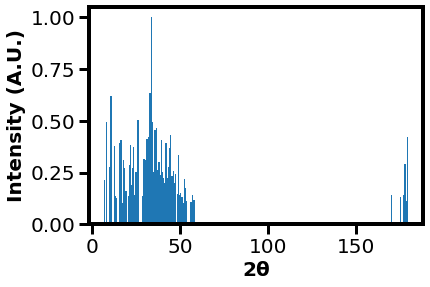

In [39]:
f_test,ax_test = plt.subplots(nrows = 1, ncols = 1)
ax_test.bar(list_thetas[max_entries_ind], list_peaks[max_entries_ind])
aj.figure_quality_axes(ax_test, r'2$\bf{\theta}$', 'Intensity (A.U.)','',legend = False)

print(np.diff(list_thetas[max_entries_ind]))
print(list_spacegroups[max_entries_ind])

In [54]:
print(len(np.unique(list_spacegroups)))

print(len(np.where(np.array(list_spacegroups) == 1)[0]))

188
543


In [23]:
##Fourier transform data
def guassian(x, a, b, c):
    return a*np.exp(-(x - b)**2./(2.*c**2.))

two_theta = np.linspace(0,180,10000)

feature_data_3 = np.zeros((len(list_peaks),len(two_theta)))

for p, peaks in enumerate(list_peaks):
    intens = 0
    for i, peak in enumerate(peaks):
        intens += guassian(two_theta, peak, list_thetas[p][i], 0.11)
    
    feature_data_3[p, :] = intens

    
feature_data_3.shape

(7219, 10000)

C:\Users\Andrew\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


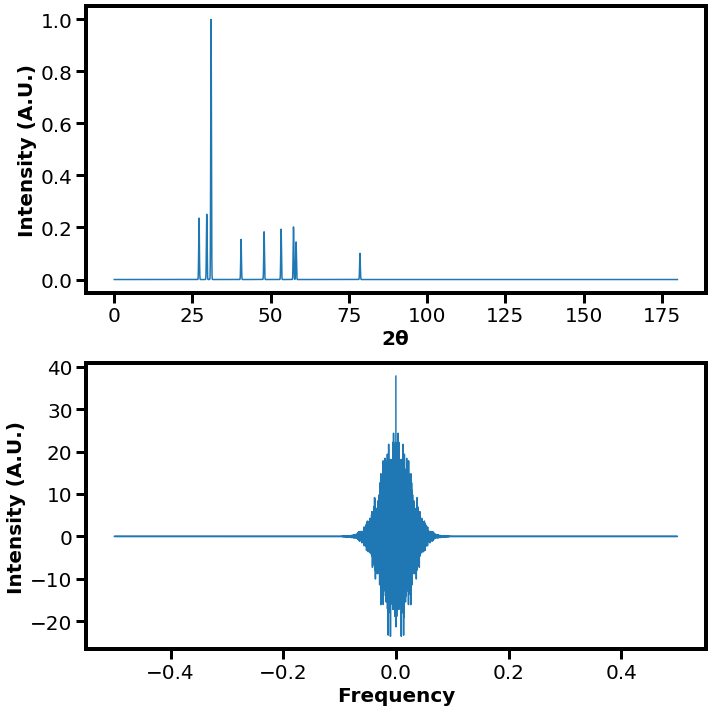

In [38]:
test = np.fft.fft(feature_data_3, axis = 1)
freq = np.fft.fftfreq(two_theta.shape[-1])
f3, ax3 = plt.subplots(nrows = 2, ncols = 1, figsize = [10,10])
ax3[0].plot(two_theta, feature_data_3[0,:])
ax3[1].plot(freq, test[0,:])

aj.figure_quality_axes(ax3[0], r'2$\bf{\theta}$', 'Intensity (A.U.)','',legend = False)
aj.figure_quality_axes(ax3[1], r'Frequency', 'Intensity (A.U.)','',legend = False)
f3.tight_layout()

C:\Users\Andrew\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Andrew\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


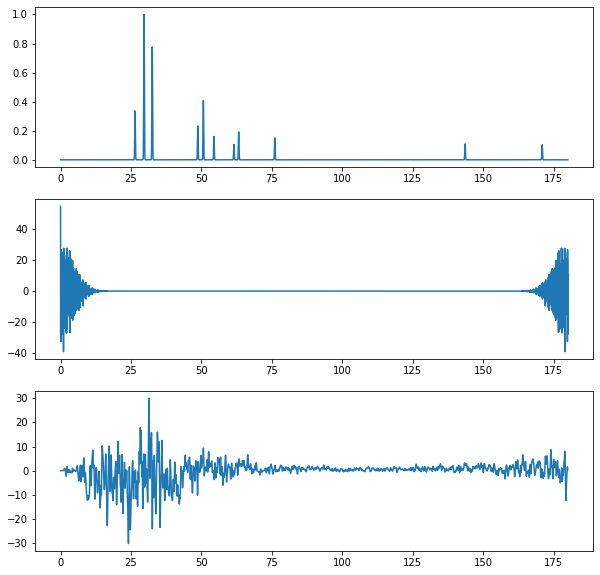

In [28]:
f3, ax3 = plt.subplots(nrows = 3, ncols = 1, figsize = [10,10])
ax3[0].plot(two_theta, feature_data_3[10,:])
ax3[1].plot(two_theta, test[10,:])
ax3[2].plot(two_theta, test2[10,:])

C:\Users\Andrew\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


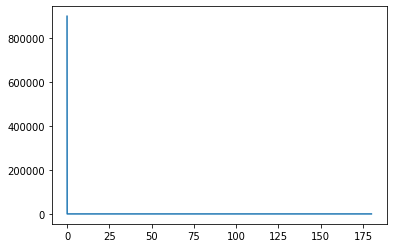

In [31]:
test = np.fft.fft(two_theta)
plt.plot(two_theta, test)